<a href="https://colab.research.google.com/github/dlyrikz/DeepLearning/blob/ANN/ANN_for_Multiclass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [3]:
# Install Tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#print(tf.__version__)

# Step 2: Data Preprocessing

In [4]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist


In [5]:
# Loading the dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# Check the shape of the datasets
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape , y_test.shape

((60000,), (10000,))

In [8]:
x_train
np.max(x_train), np.min(x_train), np.mean(x_train) # check x_train max ,min & mean value

(255, 0, 72.94035223214286)

In [9]:
y_train
np.max(y_train), np.min(y_train) # check y_train max ,min value

(9, 0)

In [10]:
# Assign classes to array

class_names = ['0 Top/T-shirt','1 Trouser', '2 Pullover','3 Dress', '4 Coat','5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag','9 Ankle Boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


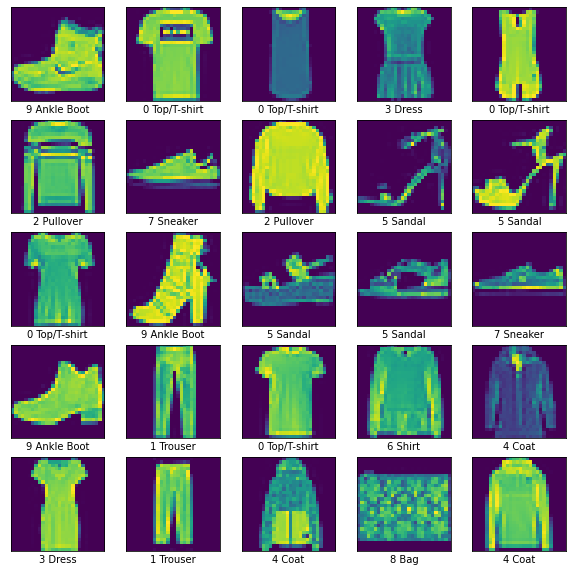

In [11]:
# Data Exploration
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
  #plt.colorbar()
plt.show()

In [12]:
y_train[4], class_names[y_train[4]]

(0, '0 Top/T-shirt')

In [13]:
# Normalize the Dataset -- Tip before training Machine Model NN learns faster
x_train = x_train / 255.0
x_test = x_test / 255.0

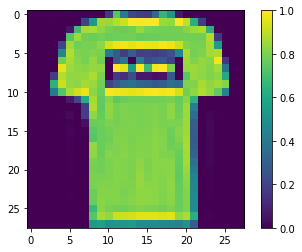

In [14]:
# Recheck Data Exploration for Normalization colorbar value should be 0 - 1
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [15]:
# Next Flatten the dataset 2 Dimension array  to single vector

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
#x_train = x_train.reshape(-1, 28*28)    #-1 Means select all in the array
#x_test = x_test.reshape(-1, 28*28)
#x_train.shape, x_test.shape

# Step 3: Building the Model

In [17]:
# Option 1: Define an object
#model = tf.keras.models.Sequential()  # sequence of Layers

# Adding first fully connected hidden layer
# 1) units (Number of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = (784.)

#model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [18]:
# Adding the second layer with dropout --prevents overfitting in the training process

#model.add(tf.keras.layers.Dropout(0.3)) # regularization technique, prevents overfitting

In [19]:
# Adding the Output Layer
# 1) units = 10  ** because 10 classes in output
# 2) activation = softmax  ** Multiple output use softmax / Binary output use sigmoid

#model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [20]:
# Option 2: Define an object & Layers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Step 4: Training the Model

In [21]:
# Compiling the model
# 1) Optimizer - adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy (acts as guide to optimizer)
# 3) matrices = sparse_categorical_accuracy  ***Tip for Binary use categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Training the Model

model.fit(x_train, y_train, epochs=10)     # epochs means the number of times to train the model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - sparse_categorical_accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379 - sparse_categorical_accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - sparse_categorical_accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - sparse_categorical_accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - sparse_categorical_accuracy: 0.9032
Epoch 9/10
1875/1875 [==========

# Step 5: Model evaluation and prediction

In [24]:
# model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.3499 - sparse_categorical_accuracy: 0.8773


In [25]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8773000240325928


In [26]:
# Model Prediction
y_predict = model.predict_classes(x_test)  #Depreciated
predictions = model.predict(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
print(y_predict[0])
np.argmax(predictions[0])

9


9

In [28]:
y_predict[11], y_test[11]  # predicted output and actual output

(5, 5)

In [29]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


In [30]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[791   2  11  40   8   1 140   0   7   0]
 [  1 977   0  15   3   0   4   0   0   0]
 [ 16   2 739   9 122   0 111   0   1   0]
 [ 13  14  10 887  47   0  24   0   5   0]
 [  0   1  78  20 814   0  85   0   2   0]
 [  0   0   0   1   0 942   0  29   1  27]
 [ 94   1  65  37  64   0 732   0   7   0]
 [  0   0   0   0   0   8   0 980   0  12]
 [  5   0   3   3   6   2   3   7 971   0]
 [  0   0   0   0   0   3   1  56   0 940]]


In [31]:
acc_cm = accuracy_score(y_test, y_predict)
print(acc_cm)

0.8773


In [32]:
# Functions to Graph Images

def plot_images(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


In [33]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

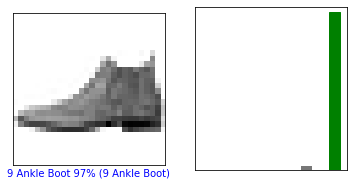

In [34]:
# Evaluate the Predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()


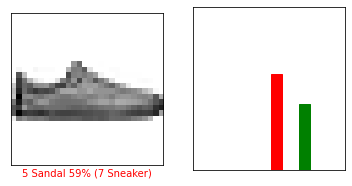

In [35]:
# Evaluate the Predictions
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()


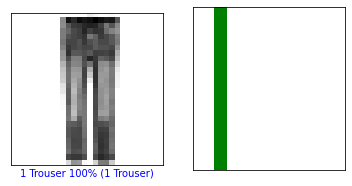

In [36]:
# Evaluate the Predictions
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()


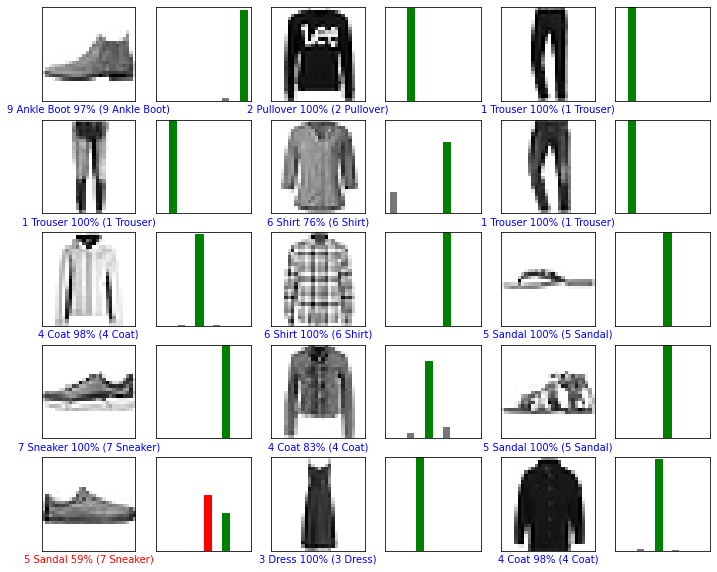

In [38]:
nrows = 5
ncols = 3
num_images = nrows * ncols
plt.figure(figsize=(2*2*ncols, 2*nrows))
for i in range(num_images):
  plt.subplot(nrows, 2*ncols, 2*i+1)
  plot_images(i,predictions, y_test, x_test)
  plt.subplot(nrows, 2*ncols, 2*i+2)
  plot_value_array(i,predictions, y_test)
plt.show()

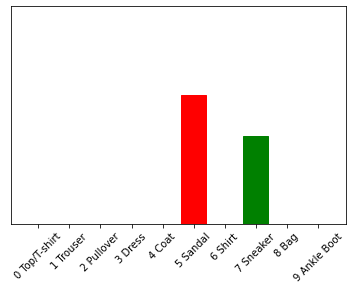

In [44]:
plot_value_array(12, predictions, y_test)

_ = plt.xticks(range(10), class_names, rotation=45)